## Imports

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Rescale of Video Frame

In [2]:
def rescale_frame(frame, scale_percent = 100):
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)

## Boiler Functions

In [3]:
def canny_edge_detector(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray_image, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

In [4]:
def region_of_interest(image):
    height = image.shape[0]
    width = image.shape[1]
    polygons = np.array([[(200, height), (1200, height), (width/2-50, height/2)]], np.int32)
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, (255, 255, 255))
    masked_image = cv2.bitwise_and(image, mask)  
    return masked_image

In [5]:
def create_coordinates(image):
    lines = cv2.HoughLinesP(image, rho=6, theta=np.pi/60, threshold=160, lines=np.array([]), minLineLength=40, maxLineGap=25)
    return lines

In [6]:
def display_lines(image, lines):
    image = np.copy(image)
    blank_image = np.zeros_like(image, dtype=np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), 10)
    
    image = cv2.addWeighted(image, 0.8, blank_image, 1, 0)
    return image

## Main

In [7]:
cap = cv2.VideoCapture(r'Dataset\sample.mp4')

while (cap.isOpened()):
    _, frame = cap.read()
    if frame is None:
        break
    
    frame = rescale_frame(frame, 90)
    frame_copy = frame.copy()
    frame_copy = canny_edge_detector(frame_copy)
    frame_copy = region_of_interest(frame_copy)
    lines = create_coordinates(frame_copy)
    frame_copy = display_lines(frame, lines)
    
    cv2.imshow("Road Lane Line Detection", frame_copy)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

##  A Sample of the working Code

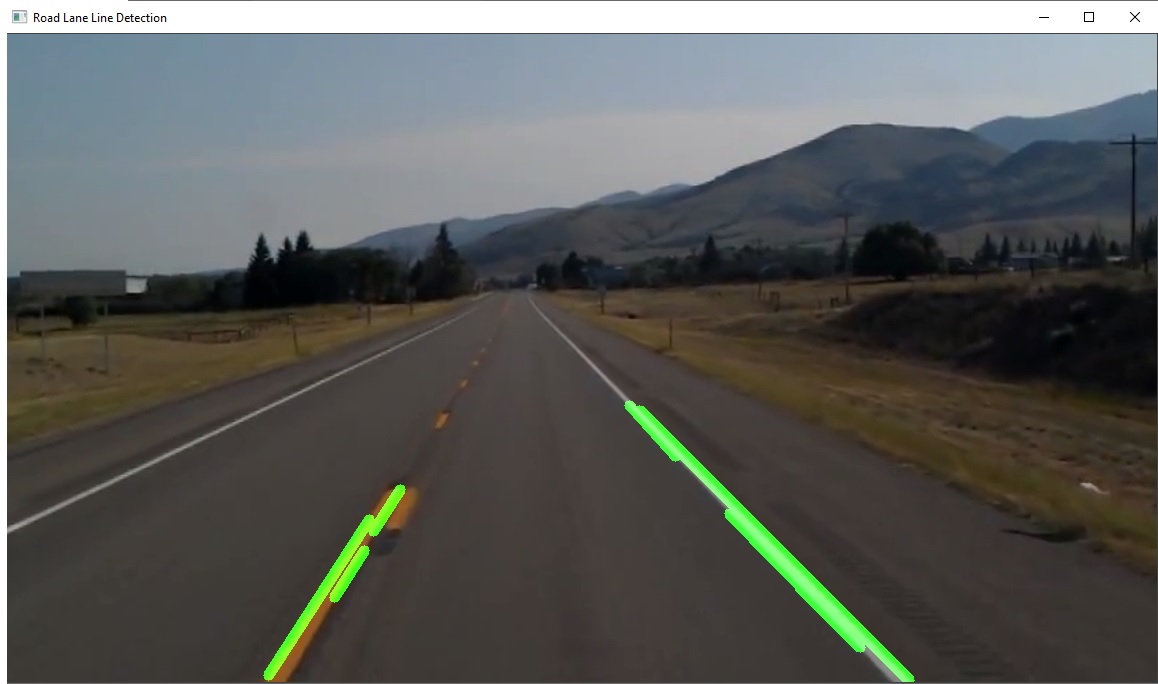